In [ ]:
!pip install numpy pandas scikit-fuzzy matplotlib requests

In [ ]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# -----------------------------
# Definisi variabel fuzzy
# -----------------------------
demand = ctrl.Antecedent(np.arange(0, 1001, 1), 'demand')
stock = ctrl.Antecedent(np.arange(0, 1001, 1), 'stock')
production = ctrl.Consequent(np.arange(0, 1001, 1), 'production')

# Membership functions
demand['low'] = fuzz.trimf(demand.universe, [0, 0, 500])
demand['medium'] = fuzz.trimf(demand.universe, [200, 500, 800])
demand['high'] = fuzz.trimf(demand.universe, [500, 1000, 1000])

stock['low'] = fuzz.trimf(stock.universe, [0, 0, 500])
stock['medium'] = fuzz.trimf(stock.universe, [200, 500, 800])
stock['high'] = fuzz.trimf(stock.universe, [500, 1000, 1000])

production['low'] = fuzz.trimf(production.universe, [0, 0, 500])
production['medium'] = fuzz.trimf(production.universe, [200, 500, 800])
production['high'] = fuzz.trimf(production.universe, [500, 1000, 1000])

# -----------------------------
# Rules
# -----------------------------
rule1 = ctrl.Rule(demand['low'] & stock['high'], production['low'])
rule2 = ctrl.Rule(demand['low'] & stock['medium'], production['low'])
rule3 = ctrl.Rule(demand['low'] & stock['low'], production['medium'])

rule4 = ctrl.Rule(demand['medium'] & stock['high'], production['medium'])
rule5 = ctrl.Rule(demand['medium'] & stock['medium'], production['medium'])
rule6 = ctrl.Rule(demand['medium'] & stock['low'], production['high'])

rule7 = ctrl.Rule(demand['high'] & stock['high'], production['medium'])
rule8 = ctrl.Rule(demand['high'] & stock['medium'], production['high'])
rule9 = ctrl.Rule(demand['high'] & stock['low'], production['high'])

# Control System
production_ctrl = ctrl.ControlSystem([
    rule1, rule2, rule3,
    rule4, rule5, rule6,
    rule7, rule8, rule9
])
production_sim = ctrl.ControlSystemSimulation(production_ctrl)

# -----------------------------
# Generate Dataset
# -----------------------------
np.random.seed(42)
data = []
for _ in range(80):  # generate 80 rows
    d = np.random.randint(0, 1001)   # Demand random
    s = np.random.randint(0, 1001)   # Stock random
    production_sim.input['demand'] = d
    production_sim.input['stock'] = s
    production_sim.compute()
    p = production_sim.output['production']
    data.append([d, s, p])

# Buat DataFrame
df_initial = pd.DataFrame(data, columns=['Demand', 'Stock', 'Production'])

# Simpan ke CSV
df_initial.to_csv("dataset_initial.csv", index=False)

df_initial.head()


,Demand,Stock,Production
0,102,435,238.816445
1,860,270,801.774892
2,106,71,500.000000
3,700,20,795.833333
4,614,121,815.893720


In [ ]:
np.random.seed(42)
data = []
for _ in range(80):  # generate 80 rows
    d = np.random.randint(0, 1001)   # Demand random
    s = np.random.randint(0, 1001)   # Stock random
    production_sim.input['demand'] = d
    production_sim.input['stock'] = s
    production_sim.compute()
    p = production_sim.output['production']
    data.append([d, s, p])

# Data awal
df_initial = pd.DataFrame(data, columns=['Demand', 'Stock', 'Production'])
df_initial.to_csv("dataset_initial.csv", index=False)  # save 3 kolom

# -----------------------------
# 6. Tambahkan 2 Kolom Insight
# -----------------------------
df_final = df_initial.copy()
df_final['Supply_Gap'] = df_final['Demand'] - df_final['Stock']
df_final['Production_Efficiency'] = df_final['Production'] / (df_final['Demand'] + 1)

# Simpan ke CSV baru (5 kolom)
df_final.to_csv("dataset_with_insight.csv", index=False)

print("✅ Dataset awal disimpan ke dataset_initial.csv (3 kolom)")
print("✅ Dataset dengan insight disimpan ke dataset_with_insight.csv (5 kolom)")
df_final.head()

✅ Dataset awal disimpan ke dataset_initial.csv (3 kolom)
✅ Dataset dengan insight disimpan ke dataset_with_insight.csv (5 kolom)


,Demand,Stock,Production,Supply_Gap,Production_Efficiency
0,102,435,238.816445,-333,2.318606
1,860,270,801.774892,590,0.931214
2,106,71,500.000000,35,4.672897
3,700,20,795.833333,680,1.135283
4,614,121,815.893720,493,1.326656


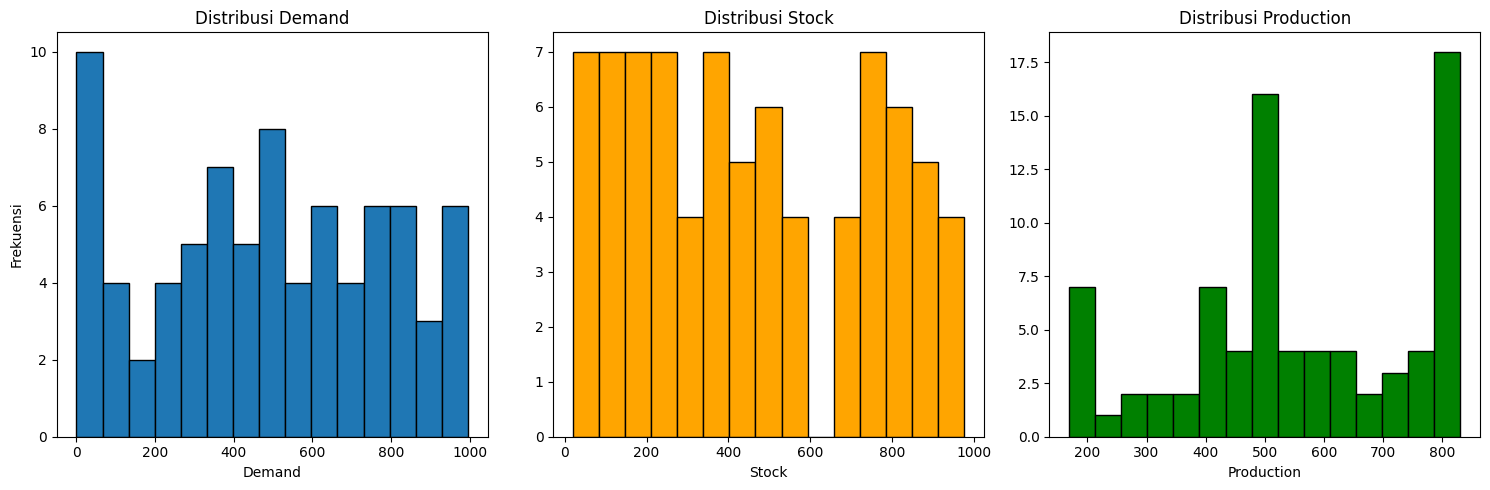

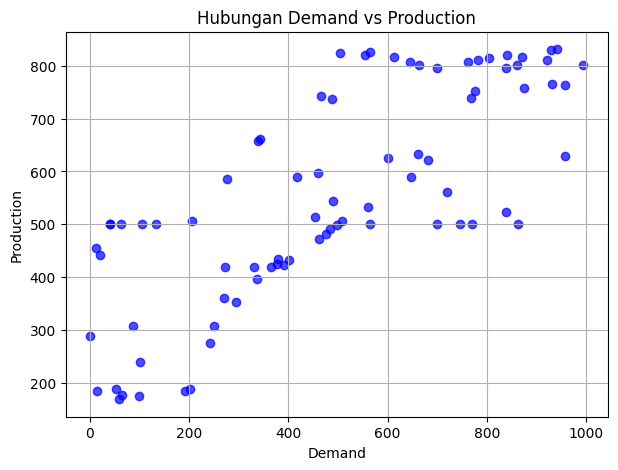

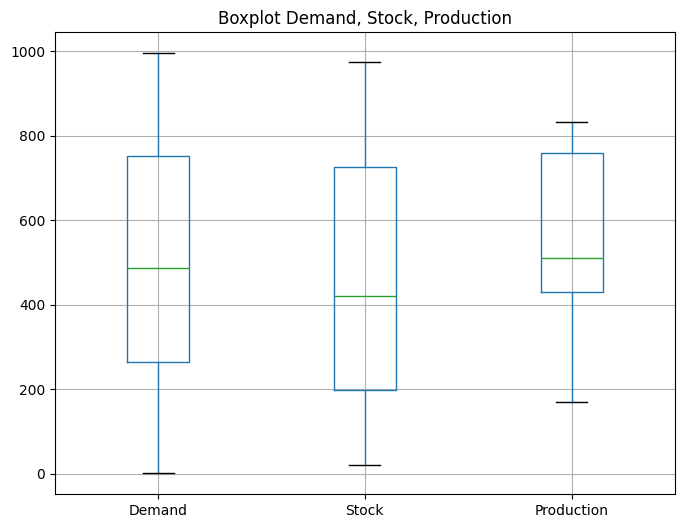

In [ ]:
import matplotlib.pyplot as plt

# Load dataset final
df = pd.read_csv("dataset_with_insight.csv")

# -----------------------------
# 1. Histogram
# -----------------------------
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].hist(df['Demand'], bins=15, edgecolor='black')
axs[0].set_title('Distribusi Demand')
axs[0].set_xlabel('Demand')
axs[0].set_ylabel('Frekuensi')

axs[1].hist(df['Stock'], bins=15, edgecolor='black', color='orange')
axs[1].set_title('Distribusi Stock')
axs[1].set_xlabel('Stock')

axs[2].hist(df['Production'], bins=15, edgecolor='black', color='green')
axs[2].set_title('Distribusi Production')
axs[2].set_xlabel('Production')

plt.tight_layout()
plt.show()

# -----------------------------
# 2. Scatter Plot Demand vs Production
# -----------------------------
plt.figure(figsize=(7,5))
plt.scatter(df['Demand'], df['Production'], alpha=0.7, c='blue')
plt.title('Hubungan Demand vs Production')
plt.xlabel('Demand')
plt.ylabel('Production')
plt.grid(True)
plt.show()

# -----------------------------
# 3. Boxplot (opsional)
# -----------------------------
plt.figure(figsize=(8,6))
df[['Demand','Stock','Production']].boxplot()
plt.title('Boxplot Demand, Stock, Production')
plt.show()


In [ ]:
!pip freeze > requirements.txt
